In [1]:
# Imports

import pandas as pd
import numpy as np
from model.model import RecommenderSystemModel
from utils import plot_vector_diffs, list_file_paths, get_value_from_results, normalize_vector, get_categories, get_vector_diff_df
from data.results import Results
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Data Analysis

In [2]:
# Get dataframes for benchmark model

csv_filepaths = list_file_paths("data/results/2024-04-24_1")

results_filepath = [filepath for filepath in csv_filepaths if filepath.split("/")[-1].startswith("run")]
items_filepath = [filepath for filepath in csv_filepaths if filepath.split("/")[-1].startswith("initial_items")]
users_filepath = [filepath for filepath in csv_filepaths if filepath.split("/")[-1].startswith("initial_users")]

benchmark_results_df = pd.read_csv(results_filepath[0])
benchmark_initial_items_df = pd.read_csv(items_filepath[0])
benchmark_initial_users_df = pd.read_csv(users_filepath[0])

In [3]:
# Get vector differences for benchmark model

df_vector_diff = get_vector_diff_df(results_filepath[0])

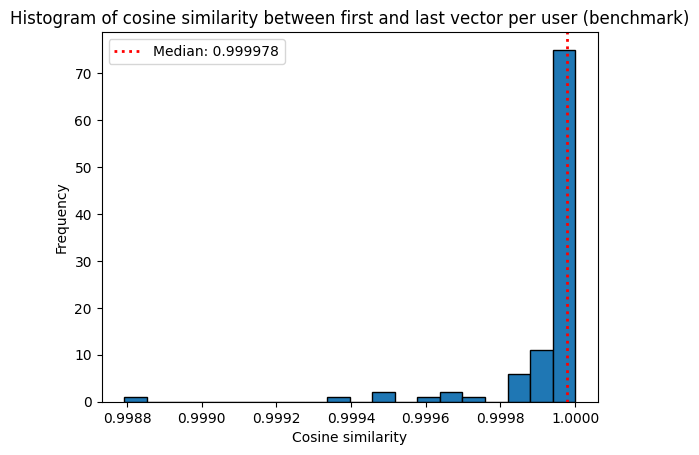

In [22]:
# Plot vector differences for benchmark model

plot_vector_diffs(df=df_vector_diff, model="benchmark")

In [4]:
# Get dataframes for random model at 10%

csv_filepaths_random_10 = list_file_paths("data/results/2024-04-24_2")

results_filepath_random_10 = [filepath for filepath in csv_filepaths_random_10 if filepath.split("/")[-1].startswith("run")]
items_filepath_random_10 = [filepath for filepath in csv_filepaths_random_10 if filepath.split("/")[-1].startswith("initial_items")]
users_filepath_random_10 = [filepath for filepath in csv_filepaths_random_10 if filepath.split("/")[-1].startswith("initial_users")]

random_10_results_df = pd.read_csv(results_filepath_random_10[0])
random_10_initial_items_df = pd.read_csv(items_filepath_random_10[0])
random_10_initial_users_df = pd.read_csv(users_filepath_random_10[0])

In [5]:
# Get vector differences for random model at 10%

df_vector_diff_random_10 = get_vector_diff_df(results_filepath_random_10[0])

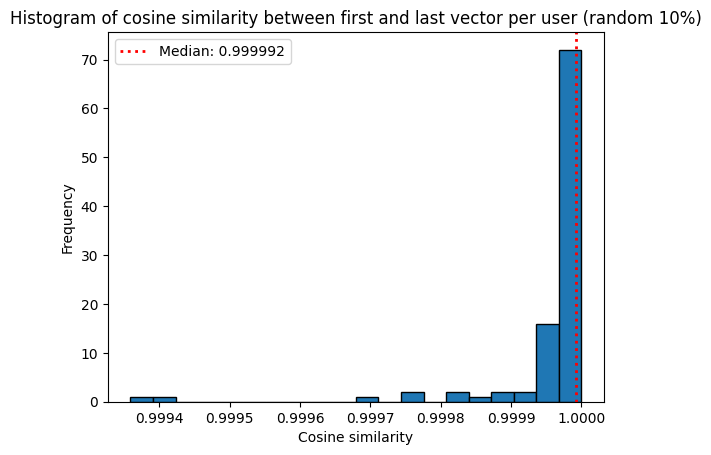

In [25]:
# Plot vector differences for random model at 10%

plot_vector_diffs(df=df_vector_diff_random_10, model="random 10%")

In [6]:
# Get dataframes for fantasy model

csv_filepaths_fantasy = list_file_paths("data/results/2024-04-24_3")

results_filepath_fantasy = [filepath for filepath in csv_filepaths_fantasy if filepath.split("/")[-1].startswith("run")]
items_filepath_fantasy = [filepath for filepath in csv_filepaths_fantasy if filepath.split("/")[-1].startswith("initial_items")]
users_filepath_fantasy = [filepath for filepath in csv_filepaths_fantasy if filepath.split("/")[-1].startswith("initial_users")]

fantasy_results_df = pd.read_csv(results_filepath_fantasy[0])
fantasy_initial_items_df = pd.read_csv(items_filepath_fantasy[0])
fantasy_initial_users_df = pd.read_csv(users_filepath_fantasy[0])

In [7]:
# Get vector differences for 'fantasy' model

df_vector_diff_fantasy = get_vector_diff_df(results_filepath_fantasy[0])

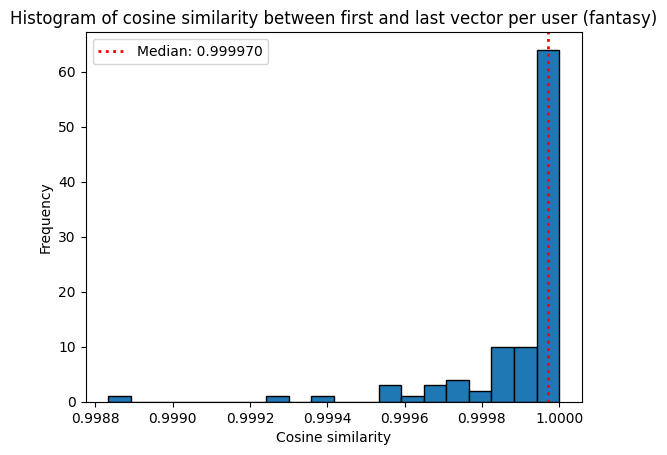

In [28]:
# Plot vector differences for 'fantasy' model

plot_vector_diffs(df=df_vector_diff_fantasy, model="fantasy")

#### Sumarized Results

In [8]:
# Get summarized vector results for all

min_vector_diff = min(df_vector_diff['vector_diff'])
user_max_diff = df_vector_diff[df_vector_diff["vector_diff"] == min_vector_diff]
min_vector_diff_random_10 = min(df_vector_diff_random_10["vector_diff"])
user_max_diff_random_10 = df_vector_diff_random_10[df_vector_diff_random_10["vector_diff"] == min_vector_diff_random_10]
min_vector_diff_fantasy = min(df_vector_diff_fantasy["vector_diff"])
user_max_diff_fantasy = df_vector_diff_fantasy[df_vector_diff_fantasy["vector_diff"] == min_vector_diff_fantasy]

max_vector_diff = 1 - min_vector_diff
max_vector_diff_random_10 = 1 - min_vector_diff_random_10
max_vector_diff_fantasy = 1 - min_vector_diff_fantasy

# Get books consumed by user with maximum difference

user_max_diff_books = get_value_from_results(
    df=benchmark_results_df,
    id=user_max_diff["AgentID"].item(),
    col_name="user_books_consumed",
    step=-1
)

user_max_diff_books_random_10 = get_value_from_results(
    df=random_10_results_df,
    id=user_max_diff_random_10["AgentID"].item(),
    col_name="user_books_consumed",
    step=-1
)

user_max_diff_books_fantasy = get_value_from_results(
    df=fantasy_results_df,
    id=user_max_diff_fantasy["AgentID"].item(),
    col_name="user_books_consumed",
    step=-1
)

# Get recommendation probability for user with maximum difference

user_max_diff_rec_proba = get_value_from_results(
    df=benchmark_initial_users_df,
    id=user_max_diff["AgentID"].item(),
    col_name="rec_proba"
)

user_max_diff_rec_proba_random_10 = get_value_from_results(
    df=random_10_initial_users_df,
    id=user_max_diff_random_10["AgentID"].item(),
    col_name="rec_proba"
)

user_max_diff_rec_proba_fantasy = get_value_from_results(
    df=fantasy_initial_users_df,
    id=user_max_diff_fantasy["AgentID"].item(),
    col_name="rec_proba"
)

# Print results

print("\t\t\t Benchmark\t Random 10%\t Fantasy")
print(f"max_diff_user_id\t {user_max_diff['AgentID'].item()}\t\t {user_max_diff_random_10['AgentID'].item()}\t\t {user_max_diff_fantasy['AgentID'].item()}")
print(f"max_diff\t\t {max_vector_diff:.6f}\t {max_vector_diff_random_10:.6f}\t {max_vector_diff_fantasy:.6f}")
print(f"max_diff_user_books\t {len(user_max_diff_books)}\t\t {len(user_max_diff_books_random_10)}\t\t {len(user_max_diff_books_fantasy)}")
print(f"max_diff_rec_proba\t {user_max_diff_rec_proba:.4f}\t\t {user_max_diff_rec_proba_random_10:.4f}\t\t {user_max_diff_rec_proba_fantasy:.4f}")

			 Benchmark	 Random 10%	 Fantasy
max_diff_user_id	 99		 95		 100
max_diff		 0.001208	 0.000641	 0.001167
max_diff_user_books	 6		 6		 7
max_diff_rec_proba	 0.0026		 0.0047		 0.0029


In [14]:
# Get initial and last vectors of user

user_max_diff_initial_vector = get_value_from_results(
    df=benchmark_results_df,
    id=user_max_diff["AgentID"].item(),
    col_name="vector",
    step=1
)
normalized_user_max_diff_initial_vector = normalize_vector(user_max_diff_initial_vector, True)

user_max_diff_initial_vector_random_10 = get_value_from_results(
    df=random_10_results_df,
    id=user_max_diff_random_10["AgentID"].item(),
    col_name="vector",
    step=1
)
normalized_max_diff_initial_vector_random_10 = normalize_vector(user_max_diff_initial_vector_random_10, True)

user_max_diff_initial_vector_fantasy = get_value_from_results(
    df=fantasy_results_df,
    id=user_max_diff_fantasy["AgentID"].item(),
    col_name="vector",
    step=1
)
normalized_max_diff_initial_vector_fantasy = normalize_vector(user_max_diff_initial_vector_fantasy, True)

user_max_diff_final_vector = get_value_from_results(
    df=benchmark_results_df,
    id=user_max_diff["AgentID"].item(),
    col_name="vector",
    step=-1
)
normalized_max_diff_final_vector = normalize_vector(user_max_diff_final_vector, True)

user_max_diff_final_vector_random_10 = get_value_from_results(
    df=random_10_results_df,
    id=user_max_diff_random_10["AgentID"].item(),
    col_name="vector",
    step=-1
)
normalized_max_diff_final_vector_random_10 = normalize_vector(user_max_diff_final_vector_random_10, True)

user_max_diff_final_vector_fantasy = get_value_from_results(
    df=fantasy_results_df,
    id=user_max_diff_fantasy["AgentID"].item(),
    col_name="vector",
    step=-1
)
normalized_max_diff_final_vector_fantasy = normalize_vector(user_max_diff_final_vector_fantasy, True)

# Create a dataframe with results

stacked_array = np.vstack([
    normalized_user_max_diff_initial_vector,
    normalized_max_diff_final_vector,
    normalized_max_diff_initial_vector_random_10,
    normalized_max_diff_final_vector_random_10,
    normalized_max_diff_initial_vector_fantasy,
    normalized_max_diff_final_vector_fantasy
])
index = pd.MultiIndex.from_tuples([
    (user_max_diff['AgentID'].item(), 1),
    (user_max_diff['AgentID'].item(), 2),
    (user_max_diff_random_10['AgentID'].item(), 1),
    (user_max_diff_random_10['AgentID'].item(), 2),
    (user_max_diff_fantasy['AgentID'].item(), 1),
    (user_max_diff_fantasy['AgentID'].item(), 2),
], names = ["AgentID", "Step"])
cols = get_categories()
normalized_vectors_df = pd.DataFrame(stacked_array, index=index, columns=cols)
normalized_vectors_df.head(10)

fantasy  non_fiction   mystery  young_adult   graphic  \
AgentID Step                                                           
99      1     4.651163    13.953488  3.488372     2.325581  3.488372   
        2     4.255319    13.829787  4.255319     2.127660  3.191489   
95      1     7.881773     5.911330  4.926108     5.418719  1.970443   
        2     8.056872     6.161137  4.739336     5.687204  2.369668   
100     1     8.593750     6.250000  4.687500     4.687500  2.343750   
        2     8.955224     5.970149  5.223881     4.477612  2.238806   

              thriller  paranormal   romance    history  biography  \
AgentID Step                                                         
99      1     3.488372    4.651163  3.488372  12.790698  12.790698   
        2     4.255319    4.255319  3.191489  12.765957  12.765957   
95      1     4.926108    7.881773  3.940887   8.866995   8.866995   
        2     4.739336    8.056872  3.791469   8.530806   8.530806   
100     1     4.687500    8.593750  3.906250   8.593750   8.593750   
        2     5.223881    8.955224  3.731343   8.208955   8.208955   

              historical_fiction    comics    poetry     crime  children  \
AgentID Step                                                               
99      1              12.790698  3.488372  0.000000  3.488372  1.162791   
        2              12.765957  3.191489  0.000000  4.255319  1.063830   
95      1               8.866995  1.970443  1.970443  4.926108  5.418719   
        2               8.530806  2.369668  1.895735  4.739336  5.687204   
100     1               8.593750  2.343750  1.562500  4.687500  7.031250   
        2               8.208955  2.238806  1.492537  5.223881  6.716418   

                fiction  
AgentID Step             
99      1     13.953488  
        2     13.829787  
95      1     16.256158  
        2     16.113744  
100     1     14.843750  
        2     14.925373

In [10]:
user_max_diff_initial_vector

'[[4 12 3 2 3 3 4 3 11 11 11 3 0 3 1 12]]'